In [8]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import lambertw
from mpl_toolkits import mplot3d
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

[159]
159
equivalent mean non-neutral delta = 0.24209145371242924


<IPython.core.display.Javascript object>


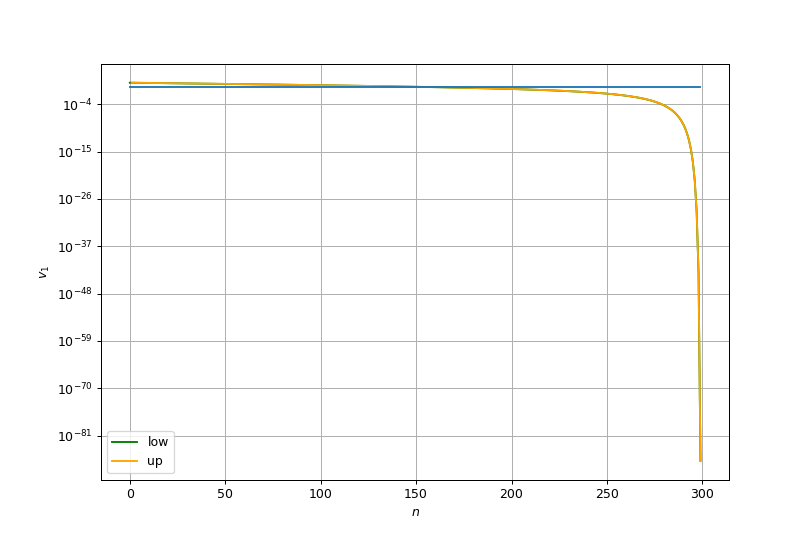

In [64]:
# some givens
slack_budget_div_beta = 200
N = 300
C0 = 1
v = 0.98

n = np.arange(N)
n_bis = np.arange(1,N)
k = np.arange(N)

C_1 = C0 * v**((N-1-n)/2)*np.exp(-slack_budget_div_beta/(N-n))
v_1 = C_1*(C0*v**(N-1-k))**(-1)
v_1_bis = C_1[1:]*(C0*v**(N-n_bis))**(-1)
indices_1 = n[v_1>0]
ok_indices_1 = k[(v_1<=1) & (v_1>0)]
indices_1_bis = n_bis[v_1_bis>0]
ok_indices_1_bis = n_bis[(v_1_bis>1)]


print(np.intersect1d(ok_indices_1,ok_indices_1_bis))
print(ok_indices_1[0])
print('equivalent mean non-neutral delta = '+str(np.exp(-slack_budget_div_beta/(N-ok_indices_1[0]))))
plt.figure(figsize=(9,6))
plt.grid()
plt.xlabel('$n$')
plt.ylabel('$v_1$')
plt.semilogy(indices_1,v_1[v_1>0],color='green')
plt.semilogy(indices_1_bis,v_1_bis[v_1_bis>0],color='orange')
plt.semilogy(indices_1,np.ones(len(indices_1)))
plt.legend(['low','up']);

<IPython.core.display.Javascript object>


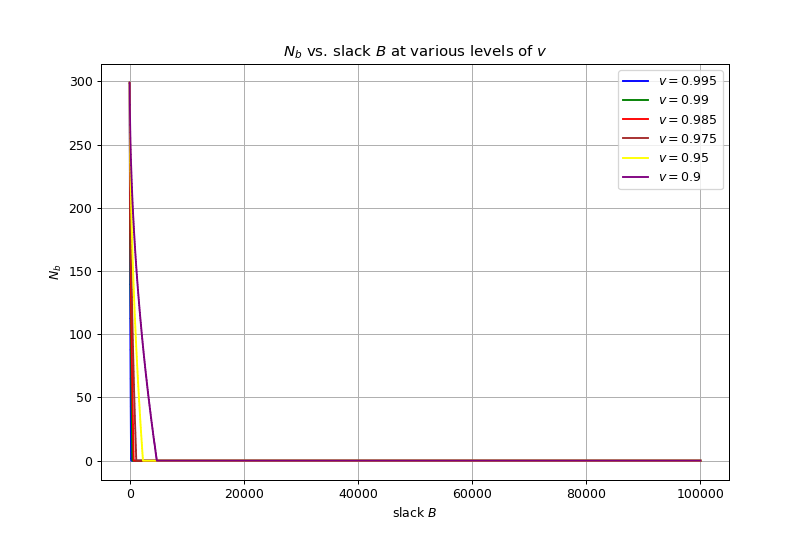

In [10]:
N = 300
C0 = 1
vector2 = np.logspace(-5,5,10000)

plt.figure(figsize=(9,6))

plt.grid()
plt.title('$N_b$ vs. slack $B$ at various levels of $v$')

v = 0.995

vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='blue');

v = 0.99

vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='green');

v = 0.985

vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='red');

v = 0.975
vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='brown');

v = 0.95
vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='yellow');

v = 0.9
vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.plot(vector2,vals_threshold,color='purple');

plt.legend(['$v = 0.995$','$v = 0.99$','$v = 0.985$','$v =0.975$','$v =0.95$','$v =0.9$'])
plt.xlabel('slack $B$')
plt.ylabel('$N_b$');
plt.savefig('Nb12.pdf')

<IPython.core.display.Javascript object>


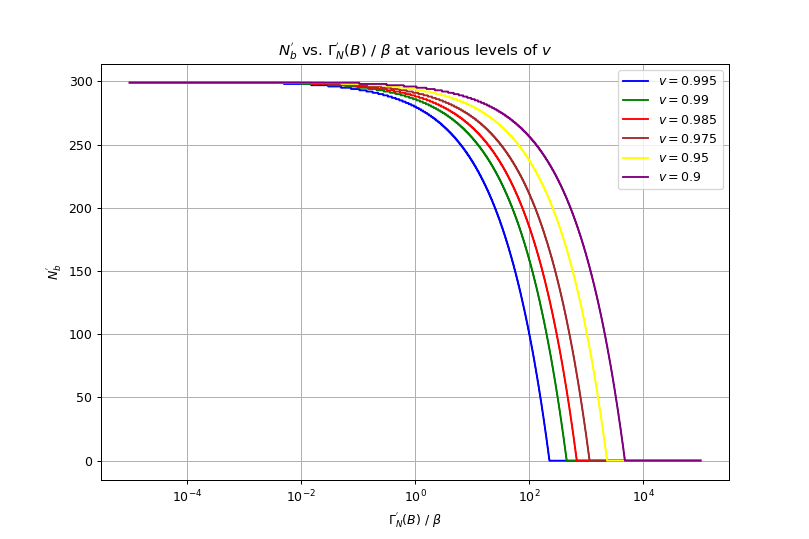

In [59]:
N = 300
C0 = 1
vector2 = np.logspace(-5,5,10000)

plt.figure(figsize=(9,6))

plt.grid()
plt.title('$N_b^{\'}$ vs. $\Gamma^{\'}_N(B)$ / '+r'$\beta$'+' at various levels of $v$')

v = 0.995

vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='blue');

v = 0.99

vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='green');

v = 0.985

vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='red');

v = 0.975
vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='brown');

v = 0.95
vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='yellow');

v = 0.9
vals = np.array([np.ceil(N-(1+np.sqrt(1-(8*slack_elem)/np.log(v)))/2) for slack_elem in vector2])
vals_threshold = np.array([np.max((0,np.min((N,Nb_elem)))) for Nb_elem in vals])
plt.semilogx(vector2,vals_threshold,color='purple');

plt.legend(['$v = 0.995$','$v = 0.99$','$v = 0.985$','$v =0.975$','$v =0.95$','$v =0.9$'])
plt.xlabel('$\Gamma^{\'}_N(B)$ / '+r'$\beta$')
plt.ylabel('$N_b^{\'}$');
plt.savefig('Nb12_log.pdf')

In [48]:
N = 300
v_vec = np.linspace(0.8,0.995,50)
slack_budget_div_beta_vec = np.logspace(-5,5,1000)

slack_budget_grid,v_grid = np.meshgrid(slack_budget_div_beta_vec,v_vec)

Nb_grid = np.zeros(v_grid.shape)

for elem_v in np.arange(len(v_vec)):
    for elem_slack_budget in np.arange(len(slack_budget_div_beta_vec)):
        slack_budget_prop,v_prop = slack_budget_grid[elem_v][elem_slack_budget],v_grid[elem_v][elem_slack_budget]
        Nb_proposal = np.ceil(N-(1+np.sqrt(1-(8*slack_budget_prop)/np.log(v_prop)))/2)
        Nb_grid[elem_v][elem_slack_budget] = np.max((0,np.min((N,Nb_proposal))))

<IPython.core.display.Javascript object>


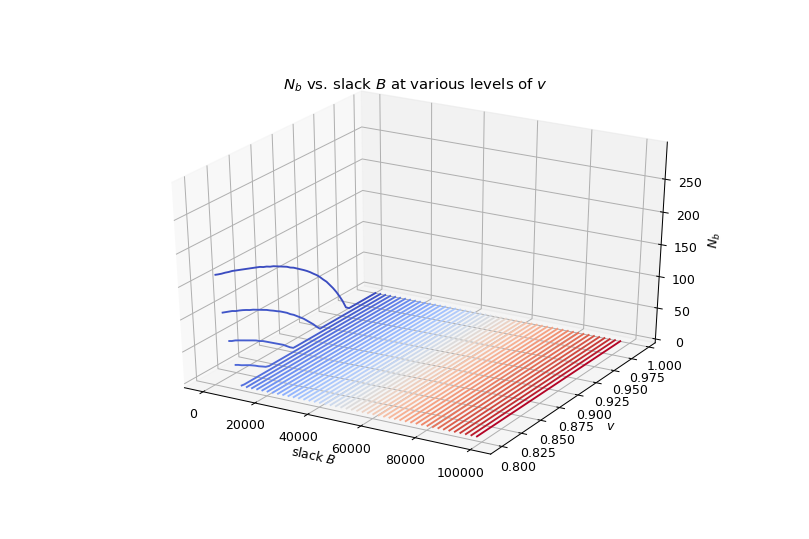

In [49]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')
ax.contour(slack_budget_grid,v_grid,Nb_grid, 50,zdir='x',cmap=cm.coolwarm)
ax.set_title('$N_b$ vs. slack $B$ at various levels of $v$');
ax.set_ylabel('$v$')
ax.set_xlabel('slack $B$')
ax.set_zlabel('$N_b$');

<IPython.core.display.Javascript object>


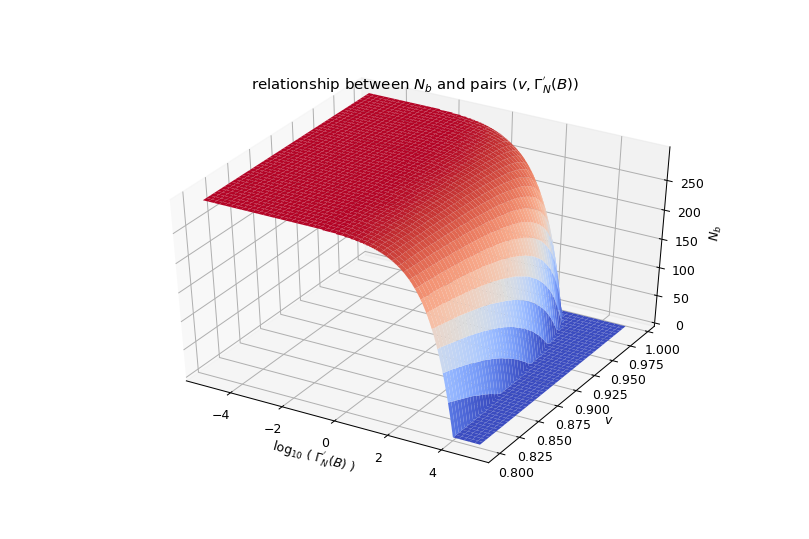

In [50]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')
ax.plot_surface(np.log10(slack_budget_grid),v_grid,Nb_grid,cmap=cm.coolwarm)
ax.set_title('relationship between $N_b$ and pairs ($v,\Gamma_N^{\'}(B)$)');
ax.set_ylabel('$v$')
ax.set_xlabel('$\log_{10}$ ( $\Gamma_N^{\'}(B)$ )')
ax.set_zlabel('$N_b$');
plt.savefig('3DNb12_log.pdf')